In [1]:
import matplotlib.pyplot as plt
from utils.csv_handler import load_demand_data

Notes
-----
The original [SMARD](https://www.smard.de) demand data represents aggregated system-level
electricity demand (Germany-wide, MWh per interval).

A uniform scaling factor `demand_scale` is applied to map the demand
to a small-consumer / household-like load level, such that a
battery energy storage system (BESS) with a capacity of 50 kWh
can meaningfully contribute to demand coverage and peak shaving.

In [2]:
csv_path = "../../data/electricity_demand/demand_2024_11.csv"

df_d, demand_series, demand_ts = load_demand_data(
    csv_path,
    resolution="15min",
    demand_scale=2e-6, # Small-consumer / household-like load level
)

df_d.head()

,Netzlast [MWh] Originalauflösungen,Netzlast inkl. Pumpspeicher [MWh] Originalauflösungen,Pumpspeicher [MWh] Originalauflösungen,Residuallast [MWh] Originalauflösungen,demand_MWh
Datum (MEZ),,,,,
2024-11-01 00:00:00+01:00,11140.50,11540.25,399.75,5693.50,0.022281
2024-11-01 00:15:00+01:00,10939.00,11357.25,418.25,5364.50,0.021878
2024-11-01 00:30:00+01:00,10840.50,11274.75,434.25,5282.50,0.021681
2024-11-01 00:45:00+01:00,10609.25,11076.00,466.75,5025.75,0.021218
2024-11-01 01:00:00+01:00,10644.00,11289.00,645.00,5143.50,0.021288


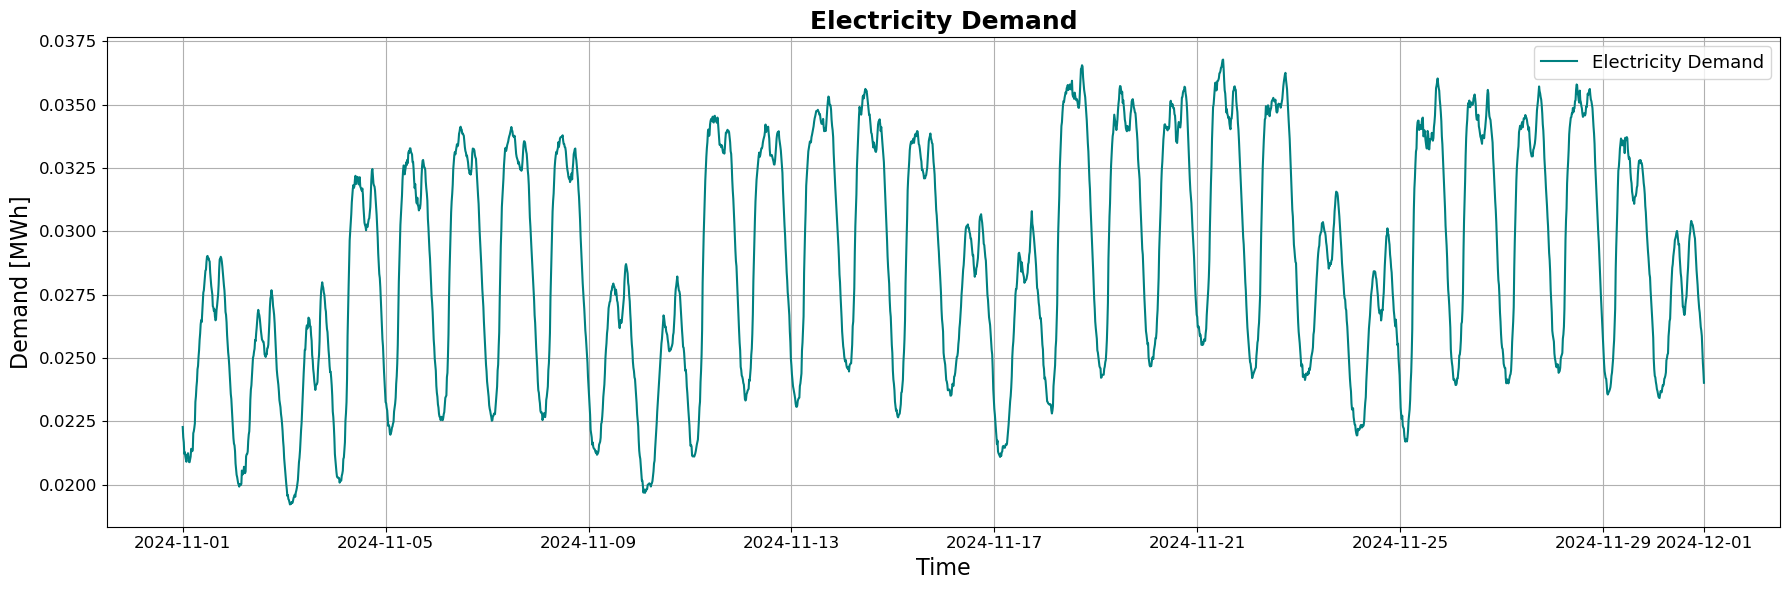

In [3]:
plt.figure(figsize=(18, 6))

plt.plot(
    df_d["demand_MWh"],
    color="teal",        
    label="Electricity Demand"
)

plt.title("Electricity Demand", fontsize=18, fontweight="bold")
plt.ylabel("Demand [MWh]", fontsize=16)
plt.xlabel("Time", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc="upper right", fontsize=13, frameon=True)
plt.grid(True)
plt.tight_layout()
plt.show()